# Exercise 2: Phase kickback

Complete the following snippets provided in the notebook.

## Imports from the Qiskit package

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity
# Numpy for numeric functions
import numpy as np
# Magic function to render plots in the notebook after the cell executing the plot command
%matplotlib inline

### Function for convenience which allows for running on the state vector simulator

In [2]:
def run_on_statevector_simulator(quantum_circuit, decimals=6):
    """Takes a circuit, and runs it on the state vector simulator backend."""
    statevector_simulator = Aer.get_backend('statevector_simulator')
    job = execute(quantum_circuit, backend=statevector_simulator)
    result = job.result()    
    statevector = result.get_statevector(quantum_circuit, decimals=decimals)
    return statevector

##  <font color='orange'>A simple phase kickback circuit</font>

The goal of this exercise is to examine a simple example of phase kickback. Complete the following task:
1. Implement the circuit generating 
$$|\psi_0\rangle = (H\otimes H)(X\otimes I)|00\rangle.$$
Visualize it and make sure it is correct.
2. Execute it on the state vector simulator and visualize the result using `plot_bloch_multivector`.
3. Add a CNOT gate to the circuit and draw the resulting circuit to make sure it is correct.
4. Execute it again the state vector simulator and visualize the result using `plot_bloch_multivector`. What do you observe? Can you explain the effect?

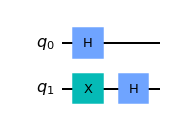

In [3]:
# Generate a quantum circuit for two qubits 
qc = QuantumCircuit(2)
# Add the gates which generate |psi_0>
qc.x(1)
qc.h(0)
qc.h(1)
# Draw the quantum circuit
qc.draw(output='mpl')

In [4]:
# Run it on the state vector simulator
vec = run_on_statevector_simulator(qc)

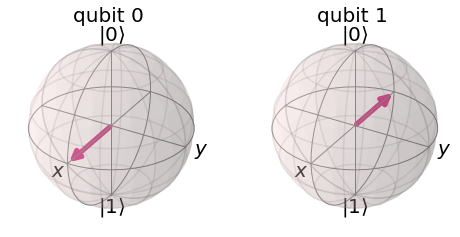

In [5]:
# Visualize the resulting state vector
plot_bloch_multivector(vec)

Since we only applied single qubit gates, our state is necessarily a product state. The $x$ axis on the Bloch sphere correspond to the states $|+\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$ (positive direction) and $|-\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. From the plot we can see that we got the state 
$$|+-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)\otimes\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) $$

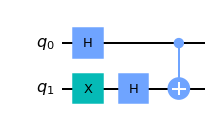

In [6]:
# Add a CNOT gate to the circuit
qc.cnot(0,1)
# Draw the circuit
qc.draw(output='mpl')

In [7]:
# Run it on the state vector simulator
vec = run_on_statevector_simulator(qc)

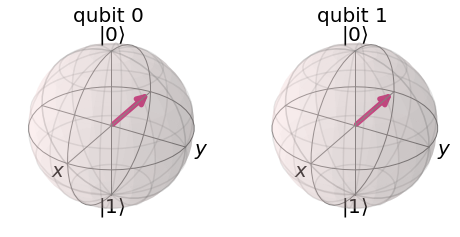

In [8]:
# Visualize the resulting state vector
plot_bloch_multivector(vec)

__Observation:__
From this plot we see that only the state of the first qubit is changed. Although qubit 0 is just for the control and qubit 1 is the target, the CNOT gate nevertheless changes the state of qubit 0. The reason for that can be understood by going through the circuit step by step. 

The initial state before applying the CNOT gate is given by
1. The first $X$ gate creates the state
$$|00\rangle \xrightarrow{X} |01\rangle.$$
2. The subsequent Hadamard gates create the state
$$|01\rangle \xrightarrow{H\otimes H} \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)\otimes|-\rangle$$
where $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$ is the eigenstates of $X$ with eigenvalues $-1$.


If we now apply the CNOT (controlled $X$) gate, it acts on the second qubit iff the control is qubit is $|1\rangle$. Thus, we obtain
$$\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)\otimes|-\rangle \xrightarrow{cX} \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)\otimes|-\rangle  =  |--\rangle.$$
Hence, we see that the second qubit is still in state $|-\rangle$. The second qubit is in $|-\rangle$ which is an eigenstate of $X$ with eigenvalue $-1$.

## <font color='green'>Optional task</font>
Replace the CNOT gate with a controlled $R_x$ gate (`crx(angle, ind_control, ind_target)`). Repeat the experiment for several angles between $[0,2\pi]$. what do you observe?

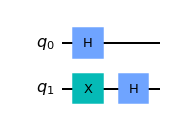

In [9]:
# Generate a quantum circuit for two qubits which generates |psi_0>
qc2 = QuantumCircuit(2)
# Add the gates
qc2.x(1)
qc2.h(0)
qc2.h(1)
# Draw the quantum circuit
qc2.draw(output='mpl')

In [10]:
# Run it on the state vector simulator for various angles of Rx
# Number of steps
nsteps = 10
for i in range(nsteps):
    # We add a controlled R_x gate with different angle to our base circuit
    qc3 = QuantumCircuit(2)
    qc3 += qc2
    qc3.crx(i*4*np.pi/nsteps,0,1)
    # Run the resulting circuit on the state vector simulator
    vec = run_on_statevector_simulator(qc3)
    # Visualize the state vector
    h = plot_bloch_multivector(vec)    
    # Save the image to disk
    h.savefig(str(i)+'.png')    

__Observation:__
Going through the figures, we observe that using controlled $R_x$ rotation around an angle $\theta$ in our circuit, the first qubit rotates around the $z$ axis with angle $\theta/2$. This can be easily understood with the following observations:
1. The initial state $|\psi_0\rangle$ before applying the controlled rotation can be written as
$$|\psi_0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)\otimes|-\rangle$$
where $|\pm\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle \pm |1\rangle\right)$ are the eigenstates of $X$ with eigenvalues $\pm1$.
2. The rotation gate $R_x(\theta)$ is given by $R_x(\theta)=\exp\left(-i\frac{\theta}{2}X\right)$. Thus, $|-\rangle$ is an eigenstate $R_x$ with eigenvalue $\exp\left(i\frac{\theta}{2}\right)$.
3. Since we are using a controlled version of the rotation gate, the $R_x(\theta)$ is only applied iff the first qubit is in state $|1\rangle.$ Thus applying the controlled rotation yields
$$|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + e^{i\theta/2}|1\rangle\right)\otimes|-\rangle.$$
4. The first part can be rewritten as
$$|\psi\rangle = e^{i\theta/4}\frac{1}{\sqrt{2}}\left(e^{-i\theta/4}|0\rangle + e^{i\theta/4}|1\rangle\right)\otimes|+\rangle.$$
Thus, we see that the result corresponds (up to a irrelevant global phase) to applying $R_z(\theta/2) = \exp\left(-i\frac{\theta}{4}Z\right)$ to the first qubit.